In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Criando os Dados

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

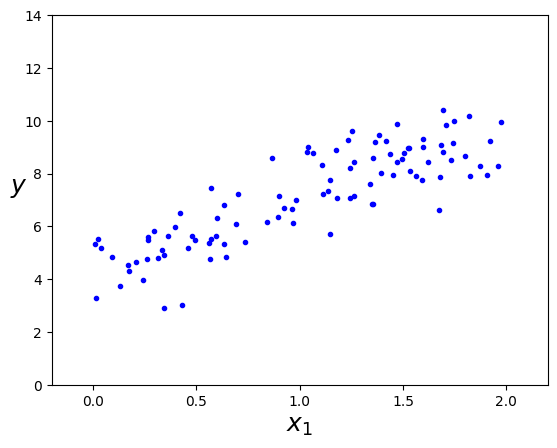

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-0.2, 2.2, 0, 14])
plt.show()

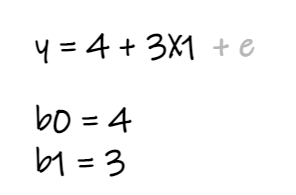

# Regressão Linear

## Equação de uma regressão linear simples (univariada)

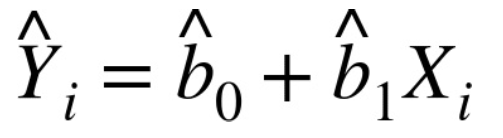

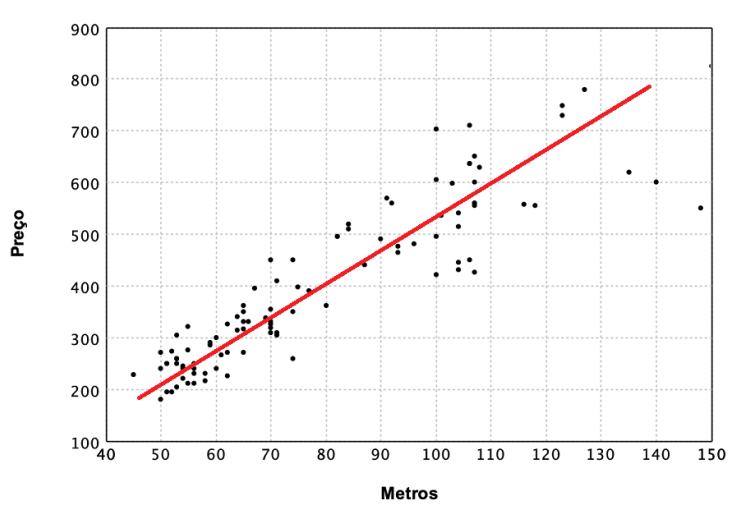

## Forma Vetorizada

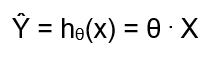

θ = Vetor de parametros do modelo

x = é o vetor de características (features)

θ . x = é o produto escalar dos vetores envolvidos

hθ(x) = é a função de hipotese, usando os parametros do modelo θ.

Exemplo: 2 features

θ = [  θ₀,

    θ₁,
    
    θ₂]  shape: (3, 1)


x = [  1,

     X₁,
      
     X₂]    shape: (3, 1)


θ . X = ŷ = 1.θ₀ + θ₁.X₁ + θ₂.X₂


Obs: é normal tambem vermos a notação θT . X como uma simples multiplação de matriz onde o θ é transformado de vetor coluna em um vetor linha.


# Exemplo

## Base Exemplo

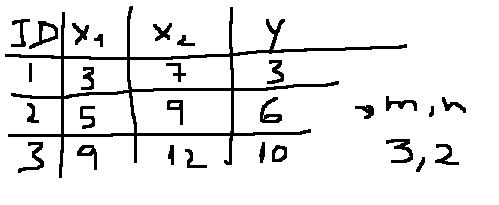

Tabela com coluna ID, duas features X1 e X2 e o label y. Shape do vetor de features X = (3,2)

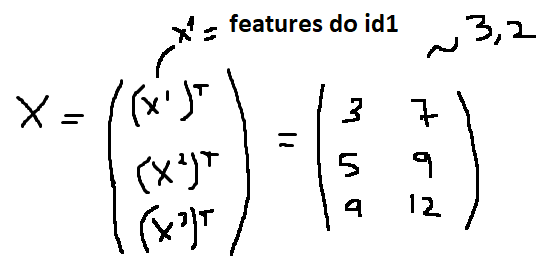

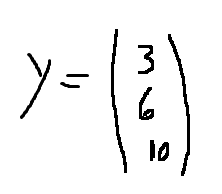

## Vetor Coluna x Vetor Linha

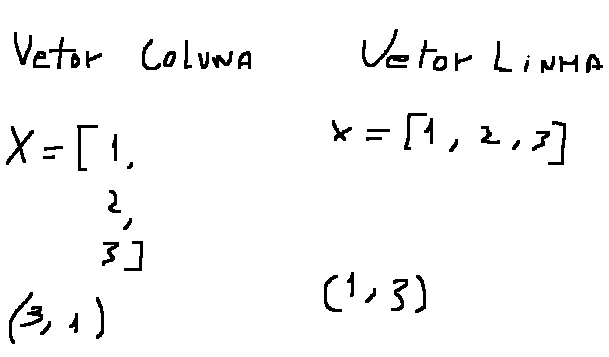

Se atentar as formas que os vetores estarao (coluna ou linha)

## Uso da função de hipótese (modelo)

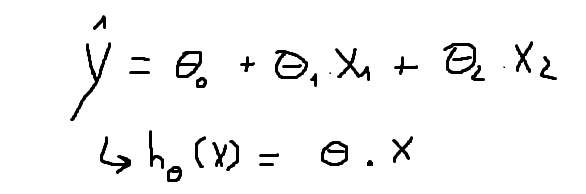

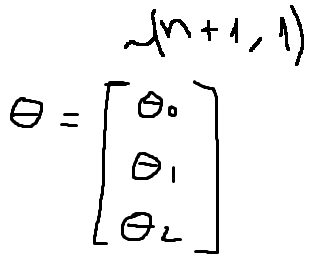

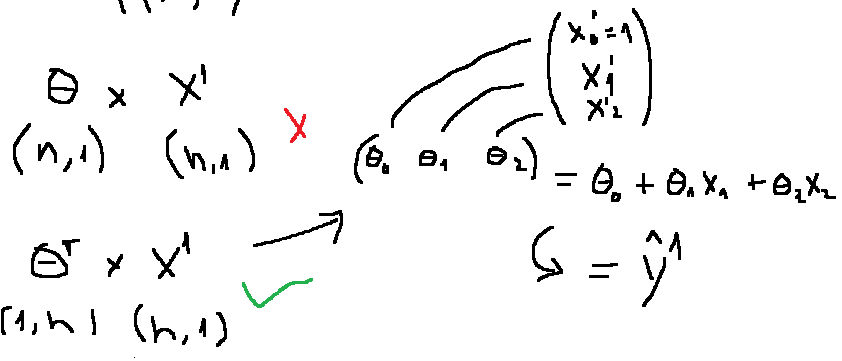

# Função de Custo

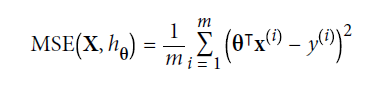

Valor que tentamos minimizar variando nossos parâmetros θ (contrário da função de ganho). 

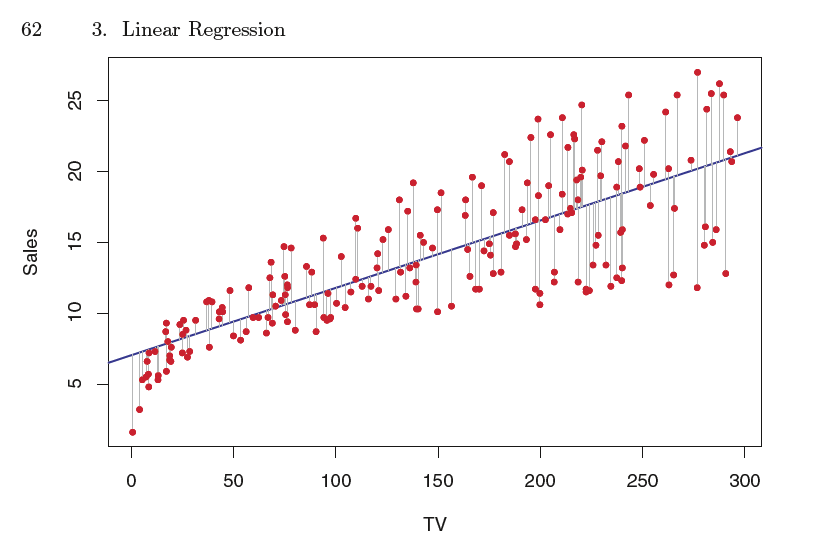

# Minimos Quadrados

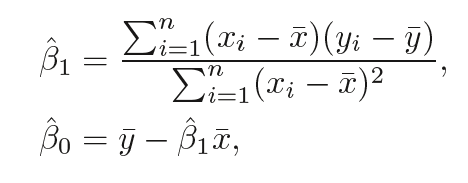

Derivando nossa função de custo em relação aos nossos parâmetros beta0 e beta1 chegamos nas fórmulas acima.

In [4]:
b1 = sum((X - X.mean())*(y - y.mean())) / sum((X - X.mean())**2)
b0 = y.mean() - X.mean()*b1

In [5]:
theta = np.concatenate([b0, b1]).reshape(2,1)

In [6]:
theta

array([[4.33009483],
       [2.73045261]])

In [7]:
theta.shape

(2, 1)

## Previsão

### Criando Vetor de previsão

In [8]:
X_new = np.array([min(X), max(X)]) # prevendo para cada o valor min e máx de X
X_new_b = np.c_[np.ones((2, 1)), X_new]  # adiciona x0 = 1 pra cada instancia
X_new_b

array([[1.        , 0.01128074],
       [1.        , 1.97511955]])

### Utilizando tal vetor e o theta para prever

In [9]:
y_predict = X_new_b.dot(theta)
y_predict

array([[4.36089635],
       [9.72306515]])

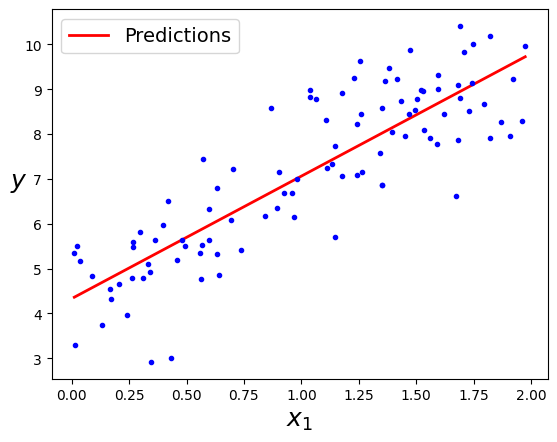

In [10]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
#plt.axis([0, 2, 0, 15])
plt.show()

# Equação Normal

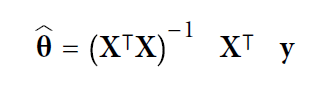

Outra forma de chegarmos aos nossos paramêtros ideais seria através da Equação Normal. Tal equação deriva de manipulação de matrizes que minimizam a função de custo e nos entrega uma solução de forma fechada.

Dois pontos de atenção são:

- Tal equação se torna muito expensiva computacionalmente conforme o número de features aumenta (complexidade de O n^2.4 a n^3).
- Ela exige que X^t * X seja invertível. 

Para contornar (razoavelmente) tais problemas é utilizado SVD (decomposição em valores singulares) que pode decompor a matriz do conjunto de treinamento X na multiplicação de três matrizes. Além de tal solução lidar com a inversão de matrizes, sua complexidade é de On^2.

In [11]:
X_b = np.c_[np.ones((len(X), 1)), X]  # add x0 = 1 to each instance
theta_eq_normal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
theta

array([[4.33009483],
       [2.73045261]])

In [13]:
theta_eq_normal

array([[4.33009483],
       [2.73045261]])

# Scikit Learn

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.33009483]), array([[2.73045261]]))

# Stats Model

In [15]:
import statsmodels.api as sm

X_b = sm.add_constant(X)

model = sm.OLS(y, X_b).fit()
predictions = model.predict(X_b) 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     265.7
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           1.16e-29
Time:                        19:09:24   Log-Likelihood:                -135.81
No. Observations:                 100   AIC:                             275.6
Df Residuals:                      98   BIC:                             280.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3301      0.197     22.016      0.0

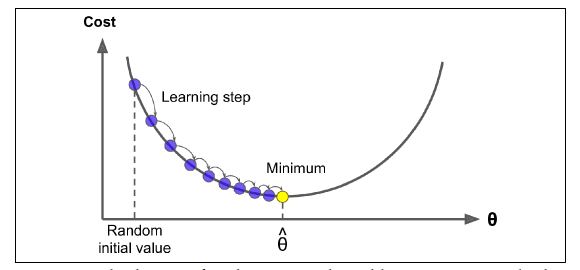

Learning Rate baixo

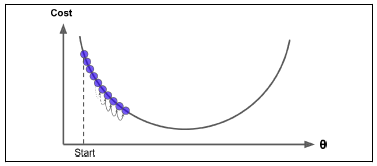




Learning Rate alto

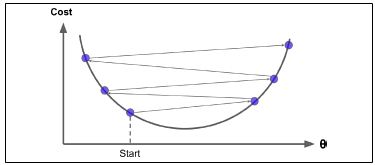

Problema de mínimo local/mínimo global e plateau

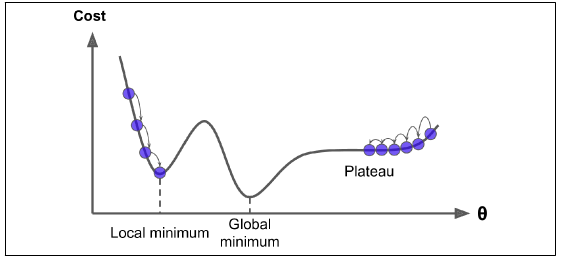

Problema de Scalling das features

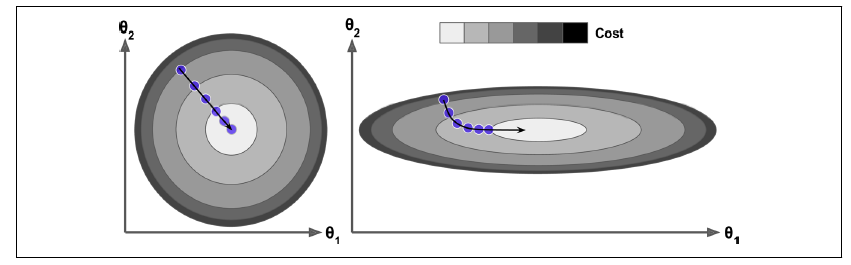

## GD em batch (lote)

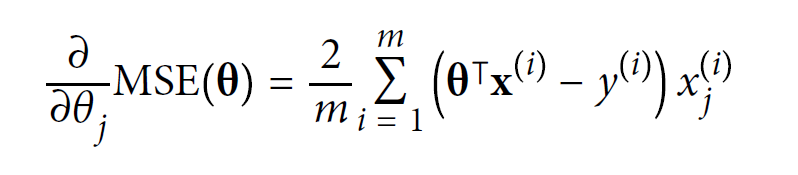

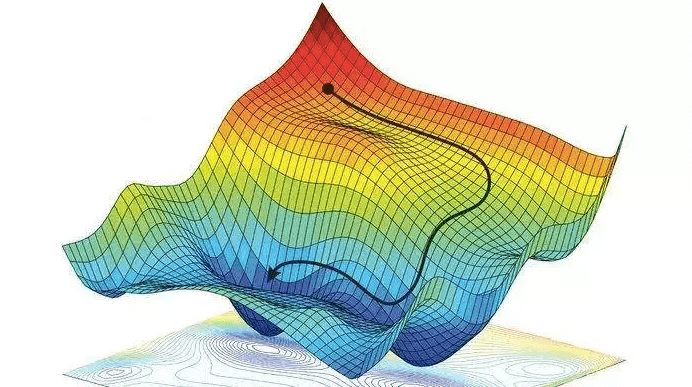

Vetor gradiente da função de custo.

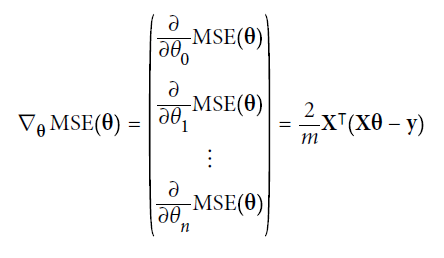


Repare que a formula utiliza todos os elementos da base de treino, por isso o nome "Batch". Em grandes bases de dados pode ser que rodagem seja bem demorada.

Theta inicial: [[-1.35817735]
 [-0.03901734]]
Theta final: [[4.33009483]
 [2.73045261]]


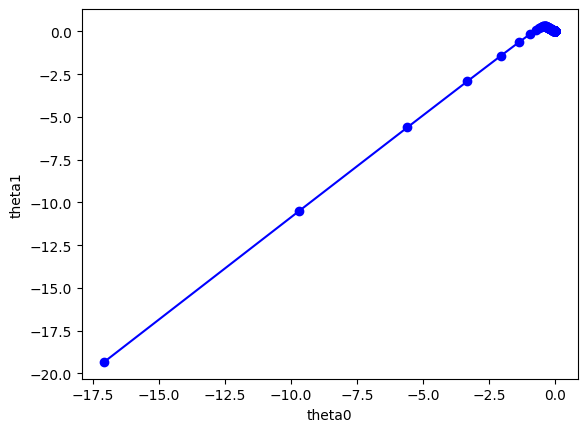

In [16]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization
print(f'Theta inicial: {theta}')

list_gradients = []
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    list_gradients.append(gradients)


list_gradients = np.array(list_gradients)
list_gradients = list_gradients.reshape(1000,2)
plt.plot(list_gradients[:,0],list_gradients[:,1], 'b-o')
plt.xlabel('theta0')
plt.ylabel('theta1')
print(f'Theta final: {theta}')

In [17]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

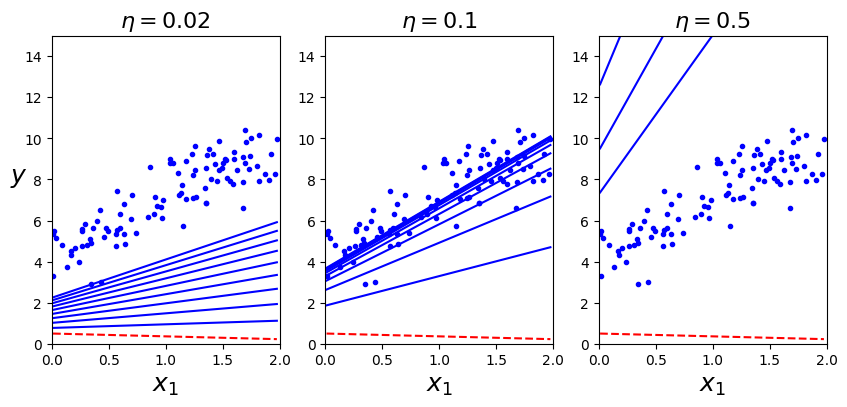

In [18]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

## GD estocástico (instância única)

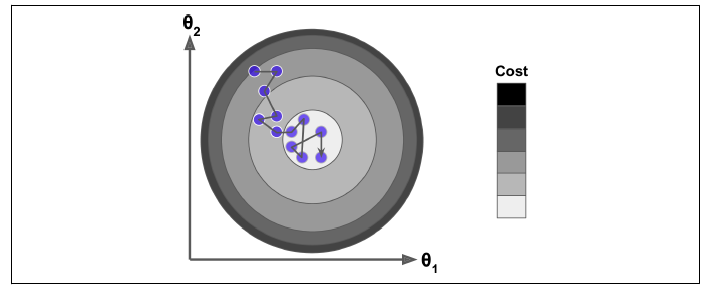

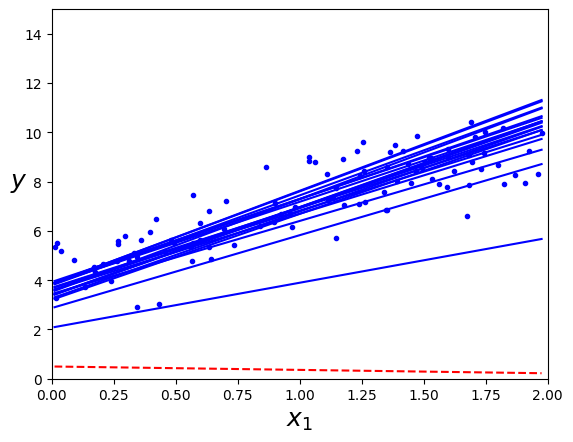

In [19]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
list_gradients = []

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)          
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                
        list_gradients.append(gradients)

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                            
plt.show()                                           

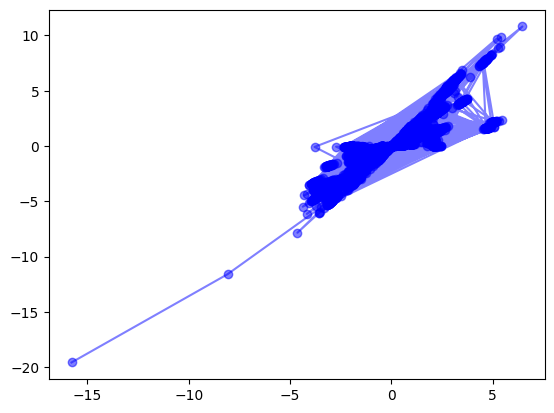

In [20]:
list_gradients =np.array(list_gradients)
list_gradients = list_gradients.reshape(5000,2)
plt.plot(list_gradients[:,0],list_gradients[:,1], 'b-o', alpha = 0.5)

## GD em mini-batch

In [21]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [22]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

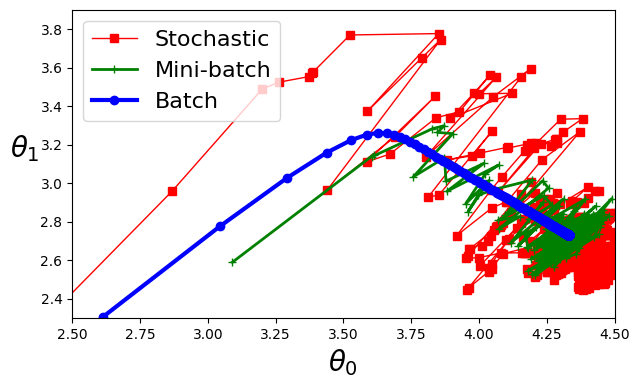

In [23]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

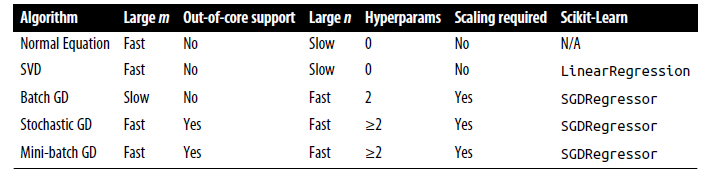